<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>


# Lab 2.2.2 
# *Mining Social Media with Twitter*

## The Twitter API and Tweepy Package

The Twitter API provides access to tweets and comments, and allows an application to post tweets to the user's timeline. 

Twitter requires developers to create and authenticate an app before they can use the API. As of recent policy changes, however, new developers must be approved before they can create an app. There is no indication of the waiting period for approval.

### 1. Apply for Developer Access

Go to https://blog.twitter.com/developer/en_us/topics/tools/2018/new-developer-requirements-to-protect-our-platform.html
and read the advice.
![image.png](attachment:image.png)

Apply at https://developer.twitter.com/en/apply-for-access.html
![image.png](attachment:image.png)

Then go to https://developer.twitter.com/en/review every day until you see whatever comes after this: 
![image.png](attachment:image.png)

### 2. Create Your Twitter App
![image.png](attachment:image.png)

### 3. Load Python Libraries

In [ ]:
pip install tweepy

In [1]:
import tweepy
import json
import pprint

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_twitter.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{   "my_consumer_key": "your consumer key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "my_consumer_secret": "your consumer secret key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"your access token (string goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"my_access_token_secret": "your access token secret (string) goes in here"` <br>
`}`

(Nb. Parsers are very fussy. Make sure each key:value pair has a comma after it except the last one!)  

Use the following code to load the credentials:  

In [7]:
pwd()  # make sure your working directory is where the file is

'C:\\Users\\dmuwa\\OneDrive\\Documents\\1.IoD\\LABS\\module 2 - SQL_DataBases_API\\Labs-20210519T011125Z-001\\Labs\\Part 2'

In [8]:
path_auth = 'auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
#pp.pprint(auth)

my_consumer_key = auth['consumer_key']
my_consumer_secret = auth['consumer_secret']
my_access_token = auth['access_token']
my_access_token_secret = auth['access_token_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody accesses this notebook while it's running on your computer 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Twitter using the Tweepy library:

In [9]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [16]:
api.followers()[5]._json

{'id': 39476061,
 'id_str': '39476061',
 'name': 'Alvin Changamire',
 'screen_name': 'TheChangamire',
 'location': 'Auckland City, New Zealand',
 'description': 'I drink a lot of beer mostly  crafty ones, \nHop Head living downunder. \n\noh and I make beer too 😁🤣😎🍻🍻',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 120,
 'friends_count': 350,
 'listed_count': 4,
 'created_at': 'Tue May 12 10:58:46 +0000 2009',
 'favourites_count': 70,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 2442,
 'lang': None,
 'status': {'created_at': 'Tue May 18 10:51:39 +0000 2021',
  'id': 1394606603014397953,
  'id_str': '1394606603014397953',
  'text': "I just earned the 'Drink Like a Kiwi (Level 85)' badge on @untappd! https://t.co/OpB2DQ0rJg",
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'untappd',
     'name': 'untappd',
     'id': 1478

Consult the Tweept and Twitter API documentation. Print a few of the response members below:

In [17]:
api.followers_ids()

[1139427828, 3150389456, 18631639, 193756312, 1444336832, 39476061, 45531123]

In [25]:
# Retrieve a Twitter user object
changa = api.get_user('TheChangamire')
changa

User(_api=<tweepy.api.API object at 0x000001BD68F4E1F0>, _json={'id': 39476061, 'id_str': '39476061', 'name': 'Alvin Changamire', 'screen_name': 'TheChangamire', 'location': 'Auckland City, New Zealand', 'profile_location': None, 'description': 'I drink a lot of beer mostly  crafty ones, \nHop Head living downunder. \n\noh and I make beer too 😁🤣😎🍻🍻', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 120, 'friends_count': 350, 'listed_count': 4, 'created_at': 'Tue May 12 10:58:46 +0000 2009', 'favourites_count': 70, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 2442, 'lang': None, 'status': {'created_at': 'Tue May 18 10:51:39 +0000 2021', 'id': 1394606603014397953, 'id_str': '1394606603014397953', 'text': "I just earned the 'Drink Like a Kiwi (Level 85)' badge on @untappd! https://t.co/OpB2DQ0rJg", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name

In [26]:
changa.status

Status(_api=<tweepy.api.API object at 0x000001BD68F4E1F0>, _json={'created_at': 'Tue May 18 10:51:39 +0000 2021', 'id': 1394606603014397953, 'id_str': '1394606603014397953', 'text': "I just earned the 'Drink Like a Kiwi (Level 85)' badge on @untappd! https://t.co/OpB2DQ0rJg", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'untappd', 'name': 'untappd', 'id': 147845476, 'id_str': '147845476', 'indices': [58, 66]}], 'urls': [{'url': 'https://t.co/OpB2DQ0rJg', 'expanded_url': 'https://untp.beer/s/b832176951', 'display_url': 'untp.beer/s/b832176951', 'indices': [68, 91]}]}, 'source': '<a href="https://untappd.com" rel="nofollow">Untappd</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'geo': None, 'coordinates': None, 'place': None, 'contributors': None, 'is_quote_status': False, 'retweet_count': 0, 'favorite_count': 0, 'fav

This will fetch recent tweets from accounts you follow:

In [22]:
# Recent tweets from accounts you follow:
tweets = api.home_timeline()
for tweet in tweets:
    print(tweet.text)

Parisians tuck into coffee and croissants again as cafes re-open https://t.co/CyZVAjIr95 https://t.co/ecgJ2OPyy0
RT @crisiscoalition: @amutambara Amendments Number 1 and 2 reveal attempts to consolidate dictatorship and rig the 2023 elections. It's unf…
How to avoid the most costly college savings mistakes: https://t.co/uvA0pvJvia Via @ForbesAdvisor https://t.co/Ny4zPYB9Ft
Elon Musk's new Tesla plant runs into Germany's 'bureaucratic hell' https://t.co/Iy32CWJbdF https://t.co/ZhyzCWpxYE
Google has just started testing what it hopes will become the new standard to replace third-party cookies https://t.co/7k4XlrMBVd
Bitcoin tumbles below $40,000 after China issues crypto warning https://t.co/99lv5mcSVE
RT @ymalhi: So cool to see the Winchcombe Meteorite at the @NHM_London less than 3 months after it collided with Earth after a 5 thousand m…
Bitcoin slides below $40,000 after China's fresh crypto curbs https://t.co/69fgoc6nld https://t.co/PmD1C5E7of
The New York attorney general’s office 

The request to see your own recent tweets is similar, but uses the `user_timeline` endpoint. Try this below:

In [27]:
#ANSWER:
# Your recent tweets:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.text)

http://t.co/buZVhMvivZ @kudamutamba
http://t.co/VnbWso3pf6 @shamielaine
http://t.co/G5Qx0Cpl16 @vajnrchangamire
http://t.co/hQVmvTzuYo @scnyandzeny
http://t.co/2bfo3C865J @nstanleyz
Played 500 hands http://t.co/7WYsYaO2FH #CelebPoker #poker
Sent a gift to one of my fellow players http://t.co/7WYsYaO2FH #CelebPoker #poker
Won 100 poker hands http://t.co/7WYsYaO2FH #CelebPoker #poker
Won 50k chips at Poker http://t.co/7WYsYaO2FH #CelebPoker #poker
Won 3 hands in a row in a poker game http://t.co/7WYsYaO2FH #CelebPoker #poker
Won 5 hands after going All-in http://t.co/7WYsYaO2FH #CelebPoker #poker
Played 10 hands http://t.co/7WYsYaO2FH #CelebPoker #poker
Won 5 poker hands http://t.co/7WYsYaO2FH #CelebPoker #poker
Won 3 hands after going All-in http://t.co/7WYsYaO2FH #CelebPoker #poker
Won 10 hands after going All-in http://t.co/7WYsYaO2FH #CelebPoker #poker
Found 10 poker buddies http://t.co/7WYsYaO2FH #CelebPoker #poker
Participated in 7 tournaments http://t.co/7WYsYaO2FH #CelebPoker #po

Now, instead of printing the text of each tweet, print the `created_at` and `id_str` methods:

In [29]:
# tweets header info
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.created_at)
    print(tweet.id_str)
    print(tweet.text)

2015-09-09 22:27:41
641739779638489090
http://t.co/buZVhMvivZ @kudamutamba
2015-09-09 22:27:13
641739664378974208
http://t.co/VnbWso3pf6 @shamielaine
2015-09-09 22:27:11
641739654421684229
http://t.co/G5Qx0Cpl16 @vajnrchangamire
2015-09-09 22:27:08
641739642413404161
http://t.co/hQVmvTzuYo @scnyandzeny
2015-09-09 22:27:03
641739621211197440
http://t.co/2bfo3C865J @nstanleyz
2013-06-07 15:10:14
343022091051859969
Played 500 hands http://t.co/7WYsYaO2FH #CelebPoker #poker
2013-06-04 20:00:07
342007881660506113
Sent a gift to one of my fellow players http://t.co/7WYsYaO2FH #CelebPoker #poker
2013-06-04 19:02:18
341993332047749120
Won 100 poker hands http://t.co/7WYsYaO2FH #CelebPoker #poker
2013-05-30 17:17:52
340155109642235904
Won 50k chips at Poker http://t.co/7WYsYaO2FH #CelebPoker #poker
2013-05-30 17:09:55
340153109491879936
Won 3 hands in a row in a poker game http://t.co/7WYsYaO2FH #CelebPoker #poker
2013-05-30 17:08:23
340152722072424449
Won 5 hands after going All-in http://t.co

In [30]:
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet._json)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.DataFrame(tweet_list)
df

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang
0,Wed Sep 09 22:27:41 +0000 2015,641739779638489090,641739779638489090,http://t.co/buZVhMvivZ @kudamutamba,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,...,None,None,None,False,1,1,False,False,False,und
1,Wed Sep 09 22:27:13 +0000 2015,641739664378974208,641739664378974208,http://t.co/VnbWso3pf6 @shamielaine,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,...,None,None,None,False,1,1,False,False,False,und
2,Wed Sep 09 22:27:11 +0000 2015,641739654421684229,641739654421684229,http://t.co/G5Qx0Cpl16 @vajnrchangamire,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,...,None,None,None,False,0,0,False,False,False,und
3,Wed Sep 09 22:27:08 +0000 2015,641739642413404161,641739642413404161,http://t.co/hQVmvTzuYo @scnyandzeny,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,...,None,None,None,False,0,0,False,False,False,und
4,Wed Sep 09 22:27:03 +0000 2015,641739621211197440,641739621211197440,http://t.co/2bfo3C865J @nstanleyz,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,...,None,None,None,False,0,0,False,False,False,und
5,Fri Jun 07 15:10:14 +0000 2013,343022091051859969,343022091051859969,Played 500 hands http://t.co/7WYsYaO2FH #Celeb...,False,"{'hashtags': [{'text': 'CelebPoker', 'indices'...","<a href=""https://www.facebook.com/viadenpoker""...",None,None,None,...,None,None,None,False,0,0,False,False,False,en
6,Tue Jun 04 20:00:07 +0000 2013,342007881660506113,342007881660506113,Sent a gift to one of my fellow players http:/...,False,"{'hashtags': [{'text': 'CelebPoker', 'indices'...","<a href=""https://www.facebook.com/viadenpoker""...",None,None,None,...,None,None,None,False,0,0,False,False,False,en
7,Tue Jun 04 19:02:18 +0000 2013,341993332047749120,341993332047749120,Won 100 poker hands http://t.co/7WYsYaO2FH #Ce...,False,"{'hashtags': [{'text': 'CelebPoker', 'indices'...","<a href=""https://www.facebook.com/viadenpoker""...",None,None,None,...,None,None,None,False,0,0,False,False,False,en
8,Thu May 30 17:17:52 +0000 2013,340155109642235904,340155109642235904,Won 50k chips at Poker http://t.co/7WYsYaO2FH ...,False,"{'hashtags': [{'text': 'CelebPoker', 'indices'...","<a href=""https://www.facebook.com/viadenpoker""...",None,None,None,...,None,None,None,False,0,0,False,False,False,en
9,Thu May 30 17:09:55 +0000 2013,340153109491879936,340153109491879936,Won 3 hands in a row in a poker game http://t....,False,"{'hashtags': [{'text': 'CelebPoker', 'indices'...","<a href=""https://www.facebook.com/viadenpoker""...",None,None,None,...,None,None,None,False,0,0,False,False,False,en


In [35]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)
df.head()

,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang
created_at,,,,,,,,,,,,,,,,,,,,,
2015-09-09 22:27:41+00:00,641739779638489090,641739779638489090,http://t.co/buZVhMvivZ @kudamutamba,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,None,...,None,None,None,False,1,1,False,False,False,und
2015-09-09 22:27:13+00:00,641739664378974208,641739664378974208,http://t.co/VnbWso3pf6 @shamielaine,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,None,...,None,None,None,False,1,1,False,False,False,und
2015-09-09 22:27:11+00:00,641739654421684229,641739654421684229,http://t.co/G5Qx0Cpl16 @vajnrchangamire,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,None,...,None,None,None,False,0,0,False,False,False,und
2015-09-09 22:27:08+00:00,641739642413404161,641739642413404161,http://t.co/hQVmvTzuYo @scnyandzeny,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,None,...,None,None,None,False,0,0,False,False,False,und
2015-09-09 22:27:03+00:00,641739621211197440,641739621211197440,http://t.co/2bfo3C865J @nstanleyz,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,None,None,None,...,None,None,None,False,0,0,False,False,False,und


In [36]:
df.dtypes

id                            int64
id_str                       object
text                         object
truncated                      bool
entities                     object
source                       object
in_reply_to_status_id        object
in_reply_to_status_id_str    object
in_reply_to_user_id          object
in_reply_to_user_id_str      object
in_reply_to_screen_name      object
user                         object
geo                          object
coordinates                  object
place                        object
contributors                 object
is_quote_status                bool
retweet_count                 int64
favorite_count                int64
favorited                      bool
retweeted                      bool
possibly_sensitive             bool
lang                         object
dtype: object

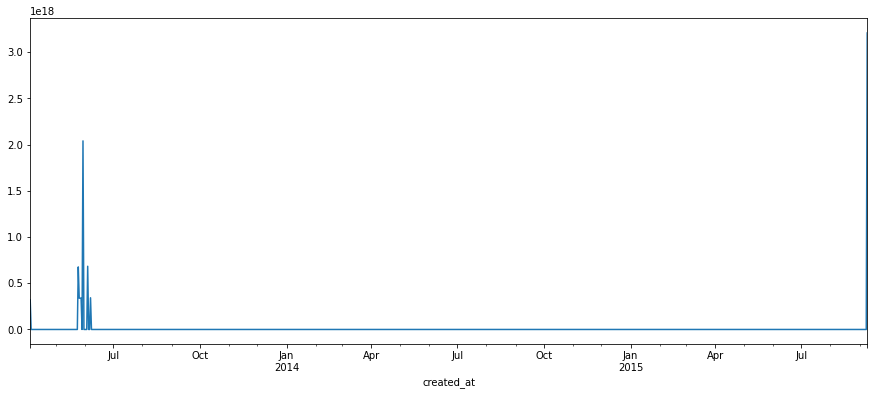

In [37]:
y = df['id'].resample('D').sum()
y.plot(figsize=(15, 6));

You can create a tweet as follows:

In [39]:
# create a tweet:
tweet = api.update_status('Test: Made with Tweepy')

TweepError: Read-only application cannot POST.

(Nb. Don't abuse this feature! If you try to generate a zillion tweets in a loop, Twitter will ban youur account.)

Tweets can be deleted by reference to their `id_str` attribute:

In [40]:
# delete a tweet:
status = api.destroy_status(tweet.id_str)

TweepError: Read-only application cannot POST.

You can follow a Tweeter:

In [41]:
# follow:
api.create_friendship('@YouTube')

TweepError: Read-only application cannot POST.

or unfollow:

In [42]:
# unfollow:
api.destroy_friendship('@YouTube')

TweepError: Read-only application cannot POST.

>
>

>
>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



